### Working with the `nltk` and `textblob` packages

Anaconda Distribution comes with `nltk`, so `import nltk` should work. 
- if not, `conda install nltk` or `pip install nltk`

However the package is also dependent on various datasets, containing vocabulary and word lists, etc. 

When using `nltk` on a computer for the first time, run `nltk.download()`, which should result in a pop-up window on which you choose `Download`.

If this doesn't work, it may be due to security permissions on your computer.
- Try the [command line installation](https://www.nltk.org/data.html#command-line-installation) and then the [manual installation](https://www.nltk.org/data.html#manual-installation) if so.


`textblob` isn't part of Anaconda Distribution, so you are likely to need to install it.
- `conda install textblob` or `pip install textblob`

Again, we need to download associated datasets:

- `python -m textblob.download_corpora`

# Text Mining
## Extracting information from unstructured text


## What is text mining?

**Text mining** refers to the processes used for **extracting information** out of **unstructured text**.

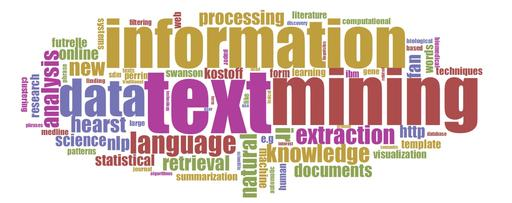

*Word-clouds such as the one shown above are typically used to convey the frequency with which particular words occur in a collection of text.*

### Structured data

First, a reminder of the properties of **structured data**:

- Data is stored in well-defined **schemas**
    - the attributes each stored value refers to is clear
- Typically, in tables, i.e. **rows** and **columns**
- **Relational databases** store related tables
    - tables are linked using **keys**
    

#### Relational database model

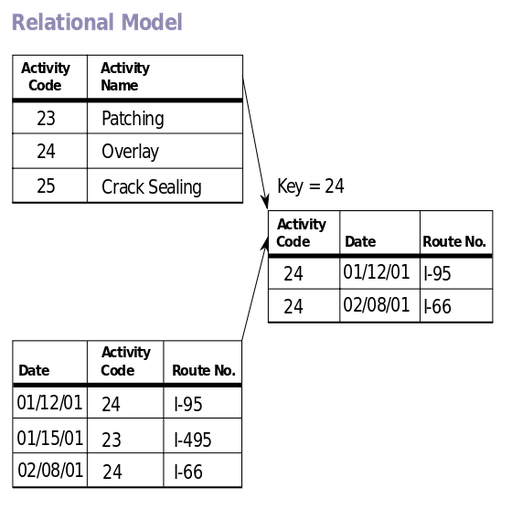


### Semi-structured data


Sometimes we have data which can be considered **semi-structured**:

- elements within the data have tags to give some meaning, i.e. **describe** the data
    - **attributes** and associated **values**

... but the **structure** or **completeness** may be inconsistent across entities relating to objects of the same type

#### JSON record 

```json
{
	"name": "John Smith",
	"married": false,
	"age": 38,
	"biography": "I went on holiday to Alaska when I was 21 and liked it so much, I never went home."
}
```

- We cannot be sure whether the next record will contain the same attributes, or have the same values but associate with different attributes

    ... but these issues can typically be addressed with suitable data collection processes and database design



### Unstructured text

Consider the following: 

- a chapter in a book 
- the body of an email
- a newspaper article
- a Twitter post
- a product review

All of these may contain **valuable information**, and we may also have **many of them** available.

... but they most likely have **no structure** with which we can determine in more detail what a given section of the text refers to.  



## Text classification

Also known as **categorisation** or **tagging**; can we associate a piece of text with others due to some common feature?


### Language detection

What language is the text written in?
- does this affect who is best to review it?
    

### Word frequency
How often do particular words appear in the text?
- can we determine what properties or themes are most prevalent?
- is this text relevant to my current task?

### Topic analysis
Does the text fit into a particular **theme** or **category**?
- how should be classified in our system?
    

### Sentiment analysis
- is the text **positive** or **negative** in tone?
- can we identify problems with our product or service?

## Text extraction

Can we identify instances of particular **types** of data within a document?

- **email addresses** and **phone numbers** (which themselves have some structure)
- **product features** (such as colour, brand, reliability, etc)
- **locations** (cities or countries mentioned)

## Natural Language Processing

Consider the following:

- how many variations of a given root word we may encounter?

> play, played, player, playful, playground...

- how many alternative words there are which have a similar meaning?

> worried, concerned, distressed, upset, fearful....

- how many words are unlikely to be of any value?

> on, in, at, to, the...

**Natural Language Processing (NLP)** techniques enable us to carry out **text extraction** and **text classification** processes more effectively.

The Python library `nltk` (**Natural Language Toolkit**), which is included with Anaconda, provides functionality to help us with many of these tasks.

[Documentation](https://www.nltk.org/)

In [6]:
import nltk

### Tokenisation

**Tokenisation** is the process of splitting a piece of text into smaller parts - each of the small parts then being considered **tokens**. 

Text can be split into tokens by various means, for example:

- full stops (to separate sentences)
- whitespace (to separate words)
- custom rules (separate according to specific criteria)

#### Tokenisation: Example

`archives.csv` contains details of complaints made to the National Archives. 

There are three columns with unstructured text - `Summary`, `Background`, and `Response`:

In [7]:
import pandas as pd
df = pd.read_csv('data/archives.csv')
df.head(3)

,Summary,Channel,Date,Background,Response,Summary Sentiment,Response Sentiment
0,Staff reported to be using the invigilation ro...,Email,3.6.14,Document Services staff can access the invigil...,We explained why staff can use this route and ...,-0.50,0.00
1,The complainant requested an estimate of a rec...,Email,5.6.14,Records that are opened following an FOI revie...,We explained that the record was not opened un...,0.00,0.16
2,Request by letter for payment to use National ...,Email,6.6.14,Finance team use industry standard stock lette...,We apologised to the complainant for any upset...,-0.65,-0.10


#### Tokenisation: Example

Here we iterate through all of the entries in the `Summary` column and use the `word_tokenise` function, creating a long single list of the tokens:

In [8]:
from nltk.tokenize import word_tokenize

In [9]:
summary_words = []

for text in df['Summary']:
    if type(text) == str: #some entries are blank
        words = word_tokenize(text)
        summary_words.extend(words)

#### Tokenisation: Example

`word_tokenize` has separated our words and the full stops `.` (which would not have occurred with a simple whitespace-based approach):

In [10]:
print(summary_words)

['Staff', 'reported', 'to', 'be', 'using', 'the', 'invigilation', 'room', 'to', 'cut', 'through', 'to', 'the', 'counter', 'area', '-', 'disturbing', 'users', 'researching', 'in', 'the', 'Document', 'Reading', 'Room', 'The', 'complainant', 'requested', 'an', 'estimate', 'of', 'a', 'record', 'that', 'had', 'been', 'opened', 'following', 'a', 'FOI', 'review', '.', 'This', 'request', 'was', 'abandoned', 'as', 'the', 'record', 'had', 'not', 'yet', 'been', 'released', 'Request', 'by', 'letter', 'for', 'payment', 'to', 'use', 'National', 'Archives', 'images', 'in', 'a', 'publication', 'was', 'felt', 'to', 'be', 'discourteous', 'by', 'the', 'complainant', 'The', 'complainant', 'was', 'disappointed', 'that', 'they', 'were', 'not', 'able', 'to', 'get', 'a', 'reader', "'s", 'ticket', 'as', 'they', 'did', 'not', 'have', 'the', 'correct', 'identification', 'The', 'complainant', 'was', 'not', 'able', 'to', 'order', 'offsite', 'records', 'in', 'advance', 'as', 'an', 'error', 'message', 'appeared', 'o

### Word counts

We can use the `FreqDist` (Frequency Distribution) class in `ntlk` to examine word counts, with the `most_common()` method returning the given number of most-frequently occurring words:

In [11]:
print(nltk.FreqDist(summary_words).most_common(10))

[('the', 121), ('was', 84), ('to', 73), ('complainant', 69), ('a', 68), ('The', 67), ('of', 49), ('not', 48), ('and', 44), ('.', 36)]


- `the` and `The` are treated separately; we could use the `.lower()` method beforehand to make all lower-case
- punctuation marks (such as `.`) are counted; we could use the `.isalnum()` method (*isAlphaNumeric*) to identify these

### Stop words

As per our example, the `most_common()` words in unstructured text tend to be those which are of limited value when trying to understand meaning.

> 'the', 'a', 'an', 'in'...

Such words are known as **stop words**.



In [12]:
from nltk.corpus import stopwords

#### English stop words used by `ntlk`:

In [13]:
sw = stopwords.words('english')
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

#### Stop words: Example

Here we use [list comprehension](https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions) with the `.lower()` and `.isalnum()` methods to filter our list:

In [14]:
summary_filtered = [word.lower() for word in summary_words if word.lower() not in sw and word.lower().isalnum()]
nltk.FreqDist(summary_filtered).most_common(10)

[('complainant', 85),
 ('record', 25),
 ('staff', 20),
 ('room', 17),
 ('dissatisfied', 16),
 ('records', 15),
 ('document', 14),
 ('service', 14),
 ('disappointed', 13),
 ('reading', 11)]

### Stemming

Notice that `record` and `records` in our example are counted independently; **stemming** is one way in which we could associate these words. 

- the **stem** of a word is identified, by the removal of common endings found on words 
- the resulting stem may not necessarily be a meaningful word
- variations on a word may not be associated if the stem has changed


#### Stemming: Examples

In [15]:
from nltk.stem import PorterStemmer
pst = PorterStemmer()
pst.stem("records")

'record'

In [16]:
pst.stem("geese")

'gees'

*The second example reveals how this technique may not always be helpful.*

### Lemmatisation

**Lemmatisation** seeks to identify **root words**, which are known as **lemmas**.

- words with the same lemma can then be associated and counted together
- often more appropriate than stemming for associating words by meaning
    - sometimes pluralisation or other forms of a word have different stems
    > "wolf", "wolves"  
    > "run", "ran"
 
Lemmas can be considered the **'dictionary form'** of words.

#### Lemmatisation: Example

In [18]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

wnl = WordNetLemmatizer()
print(wnl.lemmatize("geese"))

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tommadden/nltk_data...


goose


*The lemmatizer has identified a suitable root word, which has a different stem from the original word.*

#### Lemmatisation: Example

In [19]:
summary_lemmas = [wnl.lemmatize(word) for word in summary_filtered]
nltk.FreqDist(summary_lemmas).most_common(10)

[('complainant', 85),
 ('record', 40),
 ('staff', 20),
 ('room', 17),
 ('document', 17),
 ('dissatisfied', 16),
 ('service', 15),
 ('disappointed', 13),
 ('reading', 11),
 ('information', 11)]

- `record` and `records` have now been aggregated because they share the lemma `record`
- `document` has increased from `14` to `17`; there were `3` instances of `documents` in the original list

#### Other functionality in `nltk`

There is further functionality we may wish to make use of in `nltk`; below shows the use of `wordnet.synsets` to identify **synonyms**:

In [20]:
from nltk.corpus import wordnet 
synonyms = []   
for syn in wordnet.synsets("help"): 
    for lemma in syn.lemmas(): 
        synonyms.append(lemma.name()) 
print(set(synonyms)) 

{'assist', 'service', 'help', 'avail', 'serve', 'supporter', 'helper', 'aid', 'facilitate', 'assistant', 'help_oneself', 'assistance'}


- Be wary of relying on such functionality to be provide **comprehensive** or **accurate** results

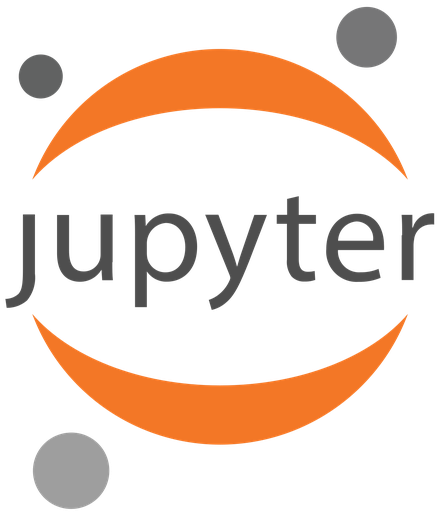

Now open the following workbook: `text-mining-workbook.ipynb`

## Sentiment Analysis

**Sentiment analysis** refers to the process of attempting to identify **subjective opinions** from a piece of text.

Most commonly this involves identifying **polarity**:
- text deemed to be conveying **negative** opinions are given a negative value (between -1 and 0)
- **neutral** text will be scored close to zero
- **positive** text will be scored above zero and up to 1

#### Sentiment analysis - difficulties

Consider these [examples](https://en.wikipedia.org/wiki/Sentiment_analysis#Examples) (Wikipedia); we may encounter difficulties with:

- double negatives
- sarcasm or irony
- rhetorical questions
- relative importance

#### TextBlob

**`textblob`** is another Python package, itself based on `nltk`, which simplifies certain text analysis tasks, including sentiment analysis.

We can create a `TextBlob` object using any string:

In [ ]:
from textblob import TextBlob
blob = TextBlob('Happy birhday David')

Now we can use the [numerous available methods](https://textblob.readthedocs.io/en/dev/api_reference.html) to find out more about, or modify, the string. For example we could translate the string using `TextBlob` which utilises the Google Translate API. Although we don't demonstrate this here you could try this on your own machine using the code below

```python
print(blob.detect_language())
print(blob.correct())
blob.translate(to=u'fr').string
```

#### Sentiment Analysis: Example

In [ ]:
df['Summary Sentiment'] = df['Summary'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['Response Sentiment'] = df['Response'].apply(lambda x: TextBlob(x).sentiment.polarity)
df.groupby('Channel')[['Summary Sentiment', 'Response Sentiment']].mean()

#### Sentiment Analysis: Example

- We retrieved the `.sentiment.polarity` attribute for each entry
    - as expected for a complaints dataset, the summaries (of the complaints) are generally negative
    - as we might hope or expect, the responses are more neutral or positive in sentiment
- `sentiment.subjectivity` is also available (a range of `0` to `1` with higher values meaning more subjective)

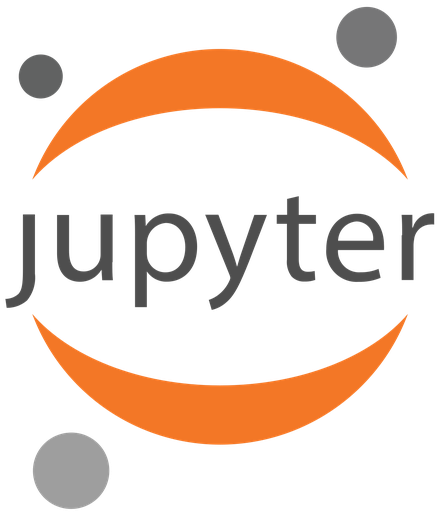

Now open the following workbook: `text-mining-workbook.ipynb`